<IPython.core.display.Javascript object>


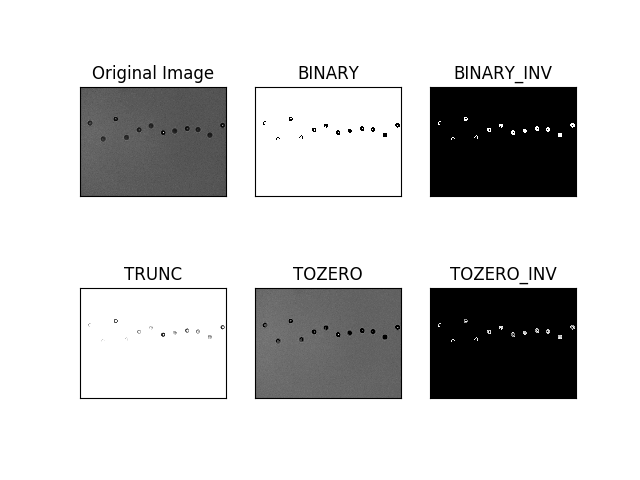

In [1]:
%matplotlib notebook
import time
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import matplotlib.patches

import cv2
# import Image module 
from PIL import Image 
from skimage.io import imread
im = imread('/Users/niloo/Desktop/Lab_data/191108/20mm_175kHz_4bar-11082019142646-1.jpg')
# open the image 
image = Image.open('/Users/niloo/Desktop/Lab_data/191108/20mm_175kHz_4bar-11082019142646-1.jpg') 
# try different threshold for the image
ret,thresh1 = cv2.threshold(np.float32(image),60,120,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(np.float32(image),60,120,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(np.float32(image),60,120,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(np.float32(image),60,120,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(np.float32(image),60,120,cv2.THRESH_TOZERO_INV)
images = [im, thresh1, thresh2, thresh3, thresh4, thresh5]
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']

for i in xrange(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

In [2]:
mask = np.zeros(shape = image.size, dtype = 'uint8')

In [4]:
# function to check if the image is RGB or gray
# returns True if it is gray, False if it is RGB

def is_grey_scale(img_path):
    img = Image.open(img_path).convert('RGB')
    w,h = img.size
    for i in range(w):
        for j in range(h):
            r,g,b = img.getpixel((i,j))
            if r != g != b: return False
    return True

In [15]:
import cv2
import numpy as np

# load the images
empty = cv2.imread('/Users/niloo/Desktop/Lab_data/191108/60mm_175kHz_4bar-11082019154154-198.jpg')
full = cv2.imread('/Users/niloo/Desktop/Lab_data/191108/20mm_175kHz_4bar-11082019142646-0.jpg')

# save original for visualization
full_c = full.copy()

# convert to grayscale
empty_g = cv2.cvtColor(empty, cv2.COLOR_BGR2GRAY)
full_g = cv2.cvtColor(full, cv2.COLOR_BGR2GRAY)

# blur to account for small camera movement
# you could try if maybe different values will maybe
# more reliable for broader cases
empty_g = cv2.GaussianBlur(empty_g, (41, 41), 0)
full_g = cv2.GaussianBlur(full_g, (41, 41), 0)

# get the difference between full and empty frame
diff = full_g - empty_g
cv2.imwrite('diff.jpg', diff)

# inverse thresholding to change every pixel above 60
# to black (that means without the droplets)
_, diff_th = cv2.threshold(diff, 60, 120, 1)
cv2.imwrite('diff_th.jpg', diff_th)

# combine the difference image and the inverse threshold
# will give us only the droplets
droplet = cv2.bitwise_and(diff, diff_th, None)
cv2.imwrite('just_the_droplet.jpg', droplet)

# threshold to get the mask instead of gray pixels
_, bag = cv2.threshold(droplet, 100, 255, 0)

# dilate to account for the blurring in the beginning
kernel = np.ones((15, 15), np.uint8)
droplet = cv2.dilate(droplet, kernel, iterations=1)

# find contours, sort and draw the biggest one
contours, _ = cv2.findContours(bag, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:3]
#cv2.drawContours(full_c, [contours[0]], -1, (0, 255, 0), 3)

# show and save the result
#cv2.imshow('droplet', full_c)
#cv2.imwrite('result2.jpg', full_c)
#cv2.waitKey(0)

In [21]:
points = np.argwhere(thresh1==0) # find where the black pixels are

<IPython.core.display.Javascript object>


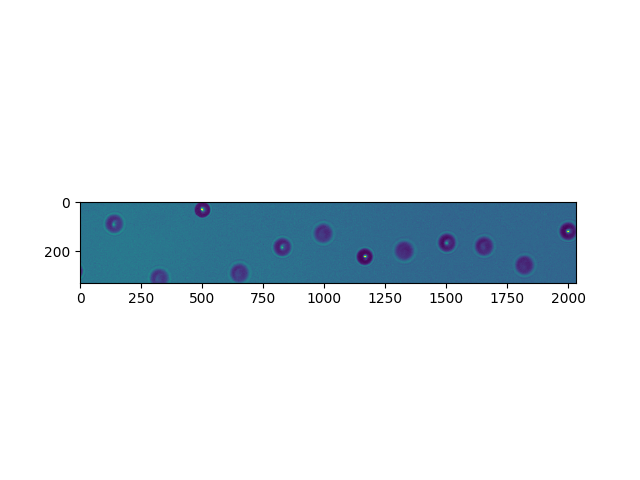

In [22]:
points = np.fliplr(points) # store them in x,y coordinates instead of row,col indices
x, y, w, h = cv2.boundingRect(points) # create a rectangle around those points
crop = np.array(image)[y:y+h, x:x+w]
plt.figure()
plt.imshow(crop)